## Importing the required laibraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn import metrics

In [4]:
## loading data and creating the dataframe
gdata=pd.read_csv('gld_price_data.csv')

In [8]:
# checkig the first 5 rows of data to have the basic understanding
gdata.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
# checking the last 5 rows of data 
gdata.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [14]:
#checking the data frame shape likw how many rows and columns are there in dataset
gdata.shape

(2290, 6)

In [16]:
# getting the overall information of data like datatypes,total values,null values and columns
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
# getting statestical information of data 
gdata.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [52]:
# as we seen above date column is in obj type so changing the data type of column
gdata['Date']=pd.to_datetime(gdata['Date'])
gdata.head()
print(gdata['Date'].dtypes)

datetime64[ns]


In [20]:
# checking for null values in data by columns
gdata.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

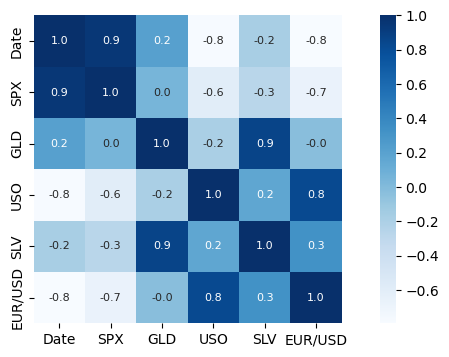

In [56]:
# checking the corelation of the fileds with the target data
corelation=gdata.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_1556\704593228.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gdata['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

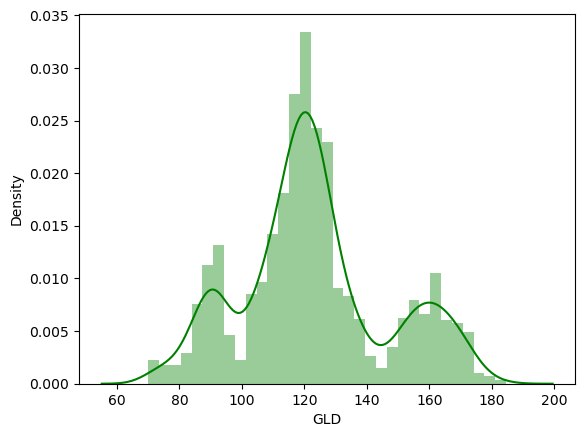

In [58]:
## check the distribution of gold
sns.distplot(gdata['GLD'],color='green')

In [62]:
# as date column is not relevant with gold prise so dropping the column
gdata.drop(columns=('Date'),inplace=True)

In [64]:
gdata.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


## model building and train test splitting of the data 

In [66]:
# splitting data into train and test data
x=gdata.drop(columns=('GLD'))
y=gdata['GLD']

In [68]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [70]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [76]:
# train test splitting the data
X_test,X_train,Y_test,Y_train=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
#training the model by linear regression model

In [78]:
linear_model=LinearRegression()

In [82]:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [86]:
test_prediction=linear_model.predict(X_test)

In [106]:
test_accu=metrics.r2_score(Y_test,test_prediction)
print('Accuracy by linear regression model =',test_accu)

Accuracy by linear regression model = 0.8829357216997616


In [108]:
# training model by random forest model


In [92]:
random_model=RandomForestRegressor()

In [94]:
random_model.fit(X_train,Y_train)

RandomForestRegressor()

In [96]:
test_pred_random_model=random_model.predict(X_test)

In [110]:
test_accu_random_model=metrics.r2_score(Y_test,test_pred_random_model)
print('Accuracy by linear regression model =',test_accu_random_model)

Accuracy by linear regression model = 0.979558199875125
